In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Regresión Lineal Simple from Scratch

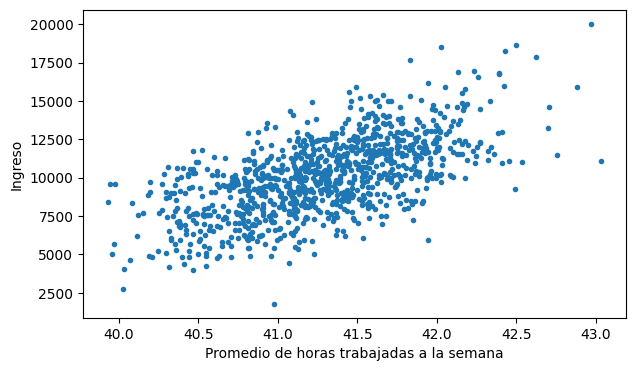

In [18]:
#Apertura del dataset a utilizar
ingreso = pd.read_csv("datasets\ingreso.csv")

#Gráfica preliminar para inspeccionar los datos a simple vista
plt.figure(figsize=(7, 4))
plt.ylabel("Ingreso")
plt.xlabel("Promedio de horas trabajadas a la semana")
plt.scatter(ingreso["horas"], ingreso["ingreso"],  marker=".")
plt.show()

Se ve a simple vista que existe una relación lineal entre las variables estudiadas.

Ecuación de la Recta Predicha
Y = 2965.35614383 X -112320.22713362
Coeficiente de Determinación (R^2): 0.391
Error Cuadrático Medio: 3770935.741


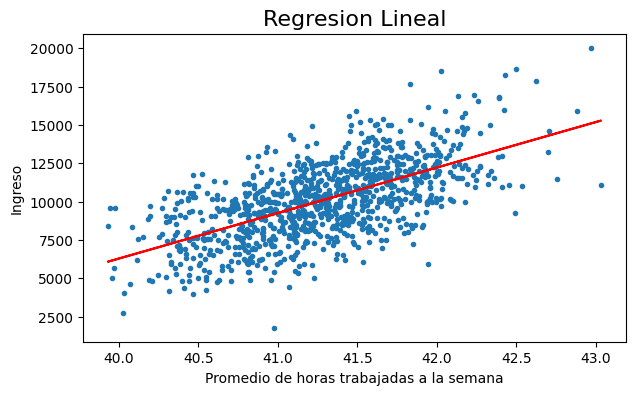

In [19]:
#Recorte del dataframe archivo
x=ingreso["horas"].values
y=ingreso["ingreso"].values

#calculo de B0 y B1 con la formula de minimos cuadrados
B1=(len(x)*sum(x*y)-sum(x)*sum(y))/(len(x)*sum(x**2)-(sum(x)**2))
B0=(sum(y)-B1*(sum(x)))/len(x)

print("Ecuación de la Recta Predicha")
print("Y = {} X {}".format(B1.round(8),B0.round(8)))

yp=(B1*x)+B0

r2 = r2_score(y,yp)
print("Coeficiente de Determinación (R^2):",r2.round(3))

MSE = mean_squared_error(y,yp) 
print("Error Cuadrático Medio:",MSE.round(3))

#Graficacion de los datos y la recta
plt.figure(figsize=(7, 4))
plt.scatter(x,y,marker=".")
plt.plot(x,yp,color="red")
plt.title("Regresion Lineal", fontsize=16)
plt.ylabel("Ingreso")
plt.xlabel("Promedio de horas trabajadas a la semana")
plt.show()

# Regresión Lineal Simple usando scikit-learn

In [15]:
#crea un objeto de regresion lineal 
regresion = linear_model.LinearRegression()

#Crea un arreglo con el promedio de horas trabajadas a la semana
x = ingreso["horas"].values.reshape(-1,1)
y = ingreso["ingreso"].values.reshape(-1,1)

#Se ajusta el modelo utilicando el metodo fit()
modelo = regresion.fit(x,y)
yp = modelo.predict(x)

#Se saca los valores de los coeficiente, pendinte y corte en y 
B1 = modelo.coef_[0][0]
B0 = modelo.intercept_[0]

#muestra la ecuacion predicha
print("Ecuación de la Recta Predicha")
print("Y = {} X {}".format(B1.round(8),B0.round(8)))

r2 = r2_score(y,yp)
print("Coeficiente de Determinación (R^2):",r2.round(3))

MSE = mean_squared_error(y,yp) 
print("Error Cuadrático Medio:",MSE.round(3))

Ecuación de la Recta Predicha
Y = 2965.35614382 X -112320.22713311
Coeficiente de Determinación (R^2): 0.391
Error Cuadrático Medio: 3770935.741


Como se puede ver produce el mismo resultado que el de aplicar la ecuación de los mínimos cuadrados, sólo varía en los últimos decimales.

Con la libreria Scikit-Learn se puede introducir valores y conseguir sus valores predichos 

   Horas  Ingreso Predicho
0     39       3328.662476
1     40       6294.018620
2     41       9259.374764
3     42      12224.730907
4     43      15190.087051
5     44      18155.443195


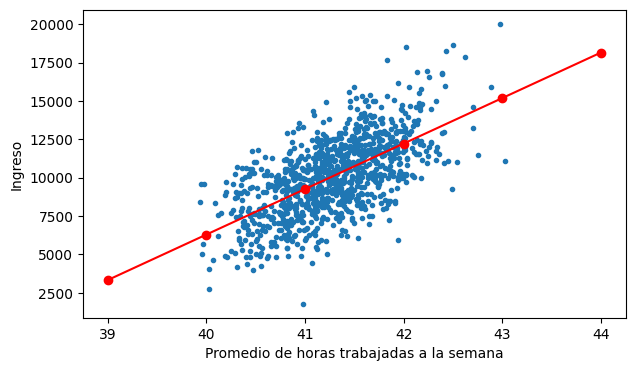

In [68]:
#Arreglo de horas para que prediga el modelo
entrada = [[39],[40],[41],[42],[43],[44]]

#Arreglo que nos predice el modelo
salida = modelo.predict(entrada)

#Para presentar la prediccion de mejor manera en un dataframe
horas_=[]
ingreso_=[]
for i in range(0,len(entrada)):
    horas_.append(entrada[i][0])
    ingreso_.append(salida[i][0])

df = pd.DataFrame({"Horas":horas_, "Ingreso Predicho":ingreso_})
print(df)

#Grafica
plt.figure(figsize=(7, 4))

#Grafica de todos los datos 
plt.ylabel("Ingreso")
plt.xlabel("Promedio de horas trabajadas a la semana")
plt.scatter(ingreso["horas"], ingreso["ingreso"],  marker=".")

#Grafica del arreglo predicho
plt.scatter(entrada,salida, marker="o", color="red")
plt.plot(entrada,salida,color="red")
plt.show()